In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import ast

games=pd.read_csv("games.csv")
sales=pd.read_csv("vgsales.csv")

In [6]:
merged=pd.merge(games,sales,left_on="Title",right_on="Name",how="inner")

In [7]:
merged.drop("Name",axis=1,inplace=True)
# merged.drop("Unnamed: 0",axis=1,inplace=True)

In [12]:
merged["Release Date"]=pd.to_datetime(merged["Release Date"])

In [13]:
merged

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,...,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Minecraft,2011-11-18,Mojang Studios,4.3,2300,2300,"Adventure, Simulator",Minecraft focuses on allowing the player to ex...,Minecraft is what you make of it. Unfortunatel...,33000,...,73,X360,2013.0,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
1,Minecraft,2011-11-18,Mojang Studios,4.3,2300,2300,"Adventure, Simulator",Minecraft focuses on allowing the player to ex...,Minecraft is what you make of it. Unfortunatel...,33000,...,169,PS3,2014.0,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
2,Minecraft,2011-11-18,Mojang Studios,4.3,2300,2300,"Adventure, Simulator",Minecraft focuses on allowing the player to ex...,Minecraft is what you make of it. Unfortunatel...,33000,...,298,PS4,2014.0,Misc,Sony Computer Entertainment Europe,1.38,1.87,0.12,0.65,4.02
3,Minecraft,2011-11-18,Mojang Studios,4.3,2300,2300,"Adventure, Simulator",Minecraft focuses on allowing the player to ex...,Minecraft is what you make of it. Unfortunatel...,33000,...,644,XOne,2014.0,Misc,Microsoft Game Studios,1.43,0.76,0.00,0.22,2.41
4,Minecraft,2011-11-18,Mojang Studios,4.3,2300,2300,"Adventure, Simulator",Minecraft focuses on allowing the player to ex...,Minecraft is what you make of it. Unfortunatel...,33000,...,715,PSV,2014.0,Misc,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,The LEGO Movie Videogame,2014-02-04,"WB Games, TT Fusion",2.8,481,481,"Adventure, Puzzle",Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700,...,3030,PS4,2014.0,Action,Warner Bros. Interactive Entertainment,0.24,0.31,0.01,0.11,0.67
995,The LEGO Movie Videogame,2014-02-04,"WB Games, TT Fusion",2.8,481,481,"Adventure, Puzzle",Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700,...,3056,WiiU,2014.0,Action,Warner Bros. Interactive Entertainment,0.35,0.23,0.03,0.06,0.66
996,The LEGO Movie Videogame,2014-02-04,"WB Games, TT Fusion",2.8,481,481,"Adventure, Puzzle",Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700,...,3884,XOne,2014.0,Action,Warner Bros. Interactive Entertainment,0.34,0.13,0.00,0.04,0.51
997,The LEGO Movie Videogame,2014-02-04,"WB Games, TT Fusion",2.8,481,481,"Adventure, Puzzle",Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700,...,4734,PSV,2014.0,Action,Warner Bros. Interactive Entertainment,0.05,0.26,0.00,0.09,0.41


In [40]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              999 non-null    object        
 1   Release Date       999 non-null    datetime64[ns]
 2   Team               999 non-null    object        
 3   Rating             999 non-null    float64       
 4   Times Listed       999 non-null    int64         
 5   Number of Reviews  999 non-null    int64         
 6   Genres             998 non-null    object        
 7   Summary            999 non-null    object        
 8   Reviews            999 non-null    object        
 9   Plays              999 non-null    int64         
 10  Playing            999 non-null    int64         
 11  Backlogs           999 non-null    int64         
 12  Wishlist           999 non-null    int64         
 13  Rank               999 non-null    int64         
 14  Platform  

C:\Users\Dell\AppData\Local\Temp\ipykernel_2348\3592402579.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")


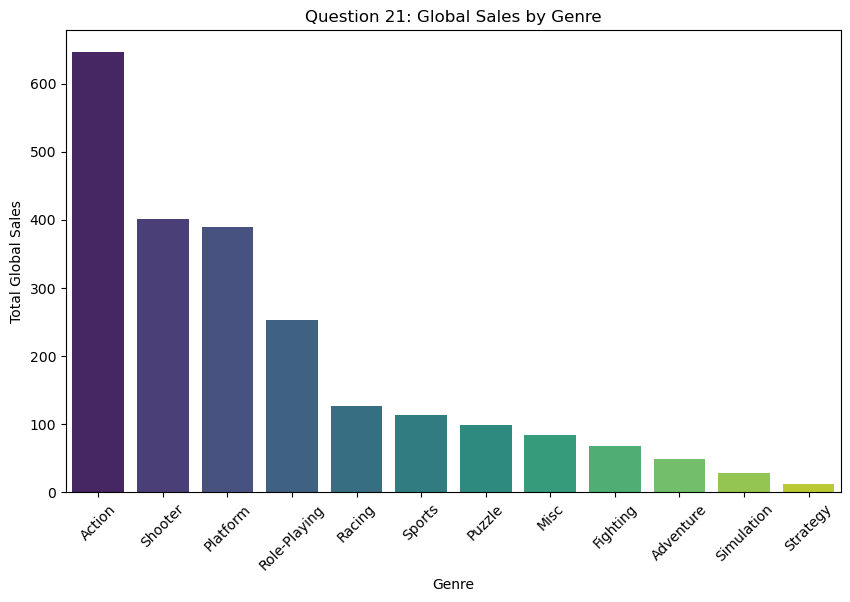

In [42]:
genre_sales = merged.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Question 21: Global Sales by Genre")
plt.ylabel("Total Global Sales")
plt.show()


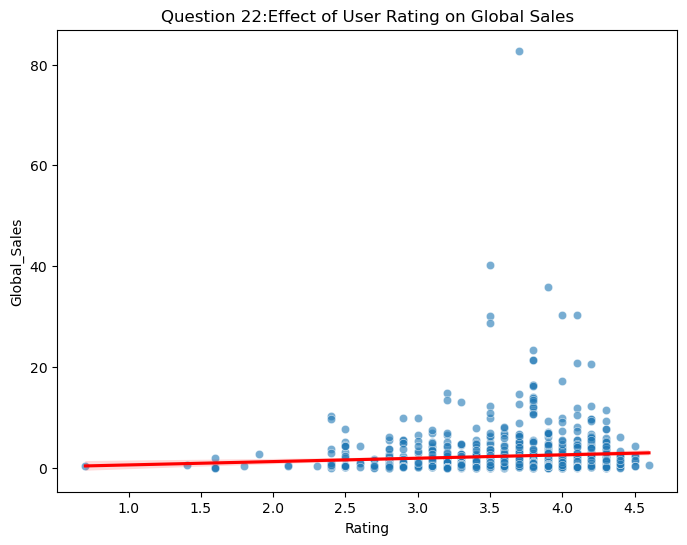

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Rating", y="Global_Sales", data=merged, alpha=0.6)
sns.regplot(x="Rating", y="Global_Sales", data=merged, scatter=False, color="red")
plt.title("Question 22:Effect of User Rating on Global Sales")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_2348\3641063042.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="magma")


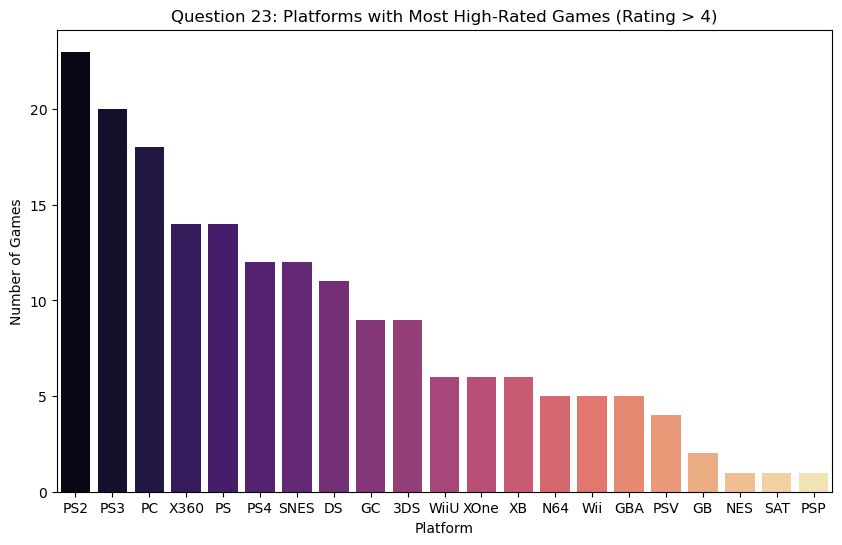

In [47]:
high_rating = merged[merged["Rating"] > 4]
platform_counts = high_rating["Platform"].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="magma")
plt.title("Question 23: Platforms with Most High-Rated Games (Rating > 4)")
plt.ylabel("Number of Games")
plt.show()


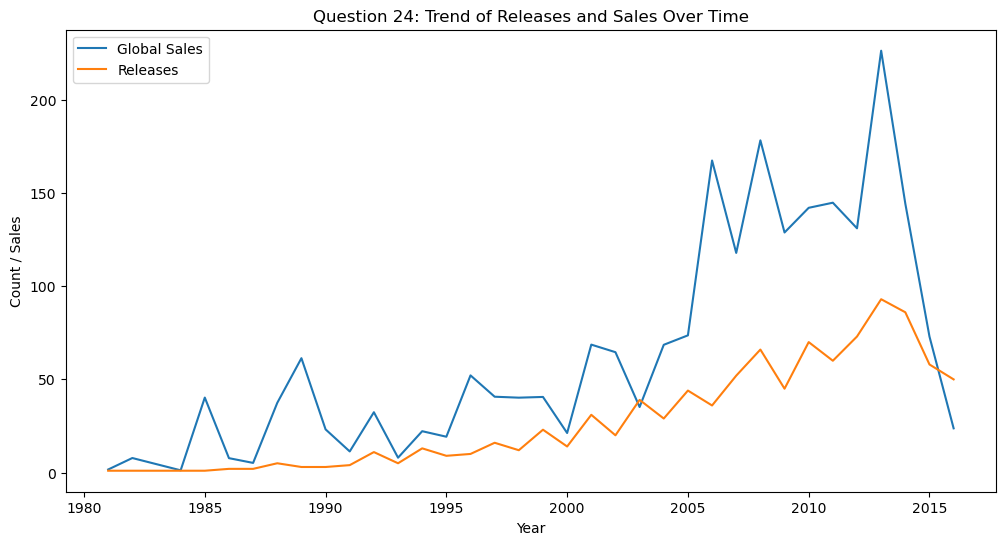

In [48]:
year_sales = merged.groupby("Year")["Global_Sales"].sum()
year_releases = merged["Year"].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=year_sales.index, y=year_sales.values, label="Global Sales")
sns.lineplot(x=year_releases.index, y=year_releases.values, label="Releases")
plt.title("Question 24: Trend of Releases and Sales Over Time")
plt.ylabel("Count / Sales")
plt.legend()
plt.show()


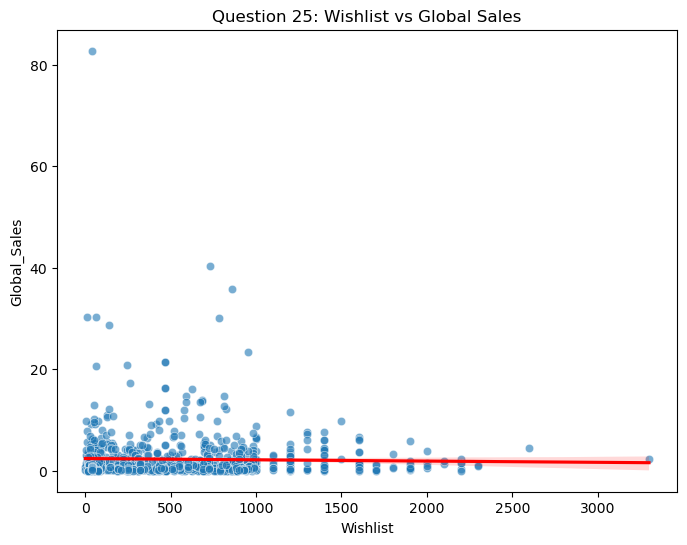

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Wishlist", y="Global_Sales", data=merged, alpha=0.6)
sns.regplot(x="Wishlist", y="Global_Sales", data=merged, scatter=False, color="red")
plt.title("Question 25: Wishlist vs Global Sales")
plt.show()


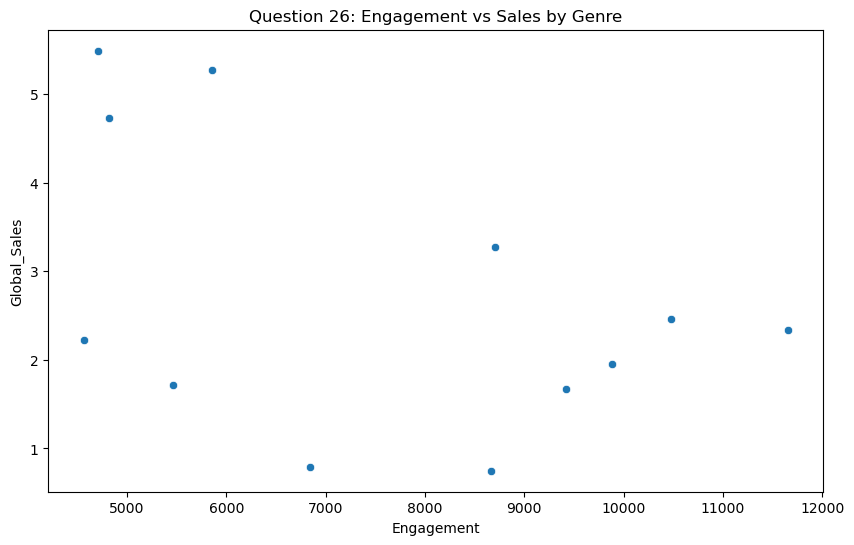

In [52]:
merged["Engagement"] = merged["Plays"] + merged["Playing"] + merged["Backlogs"] + merged["Wishlist"]
engagement_vs_sales = merged.groupby("Genre").agg({"Engagement":"mean", "Global_Sales":"mean"})

plt.figure(figsize=(10,6))
sns.scatterplot(x="Engagement", y="Global_Sales", data=engagement_vs_sales)
plt.title("Question 26: Engagement vs Sales by Genre")
plt.show()


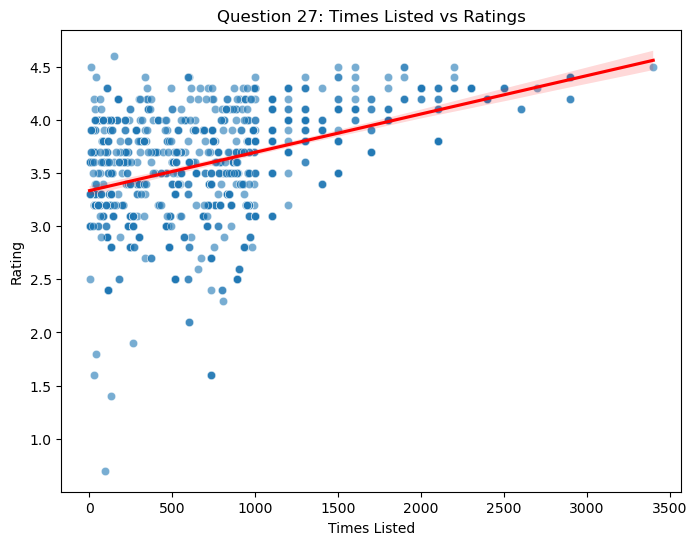

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Times Listed", y="Rating", data=merged, alpha=0.6)
sns.regplot(x="Times Listed", y="Rating", data=merged, scatter=False, color="red")
plt.title("Question 27: Times Listed vs Ratings")
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_2348\160764469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Genre", y="Engagement", data=merged, palette="coolwarm")


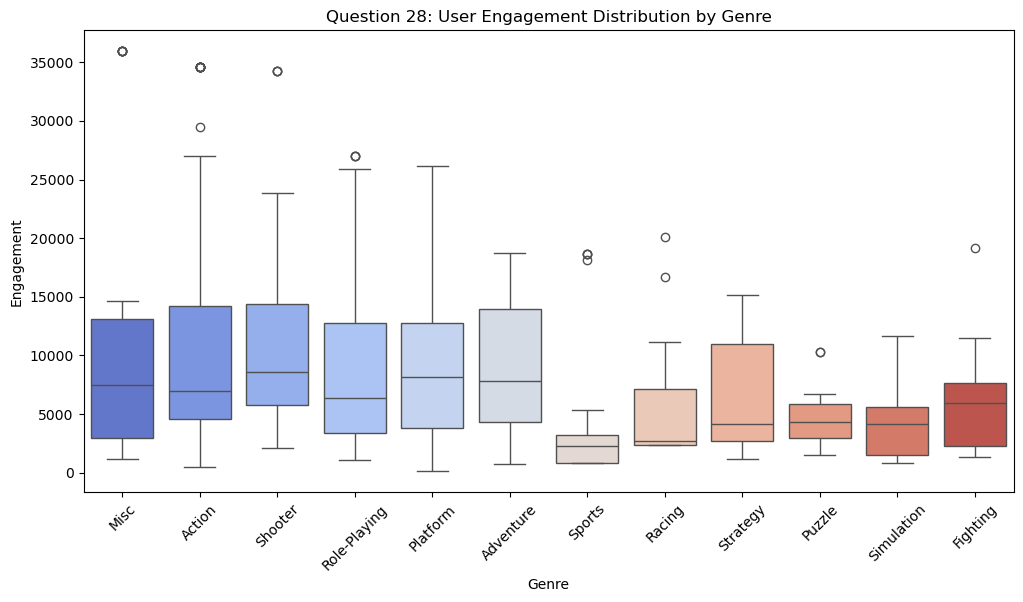

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Genre", y="Engagement", data=merged, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Question 28: User Engagement Distribution by Genre")
plt.show()


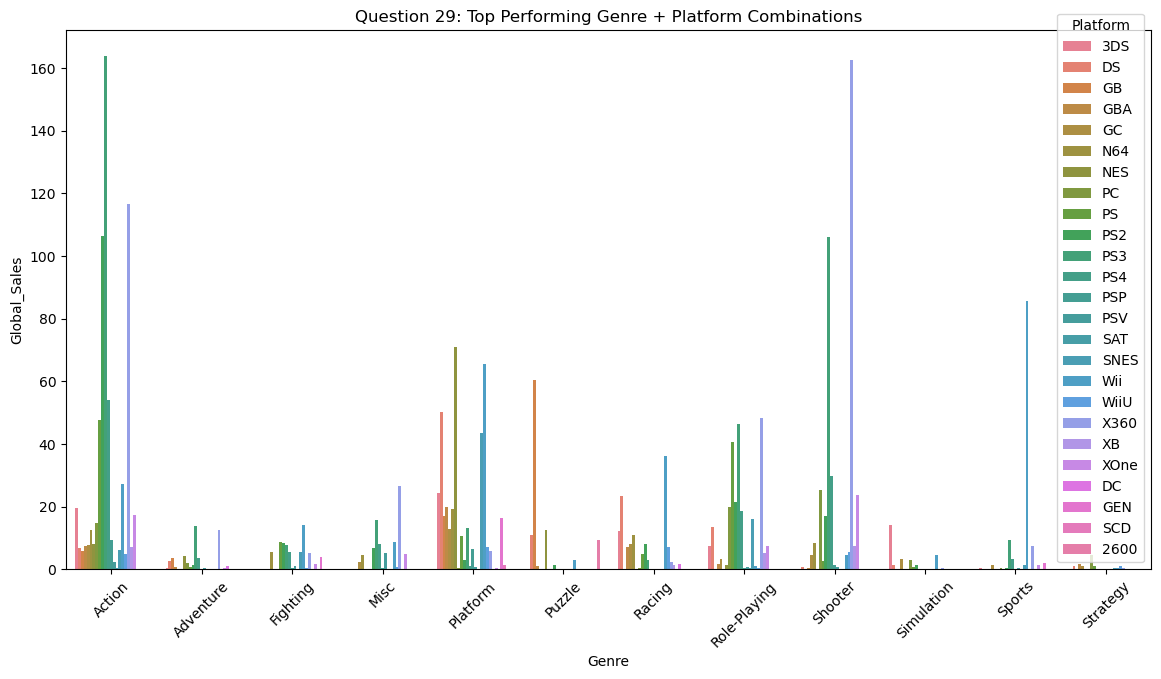

In [57]:
combo_sales = merged.groupby(["Genre","Platform"])["Global_Sales"].sum().reset_index()

plt.figure(figsize=(14,7))
sns.barplot(x="Genre", y="Global_Sales", hue="Platform", data=combo_sales)
plt.xticks(rotation=45)
plt.title("Question 29: Top Performing Genre + Platform Combinations")
plt.show()


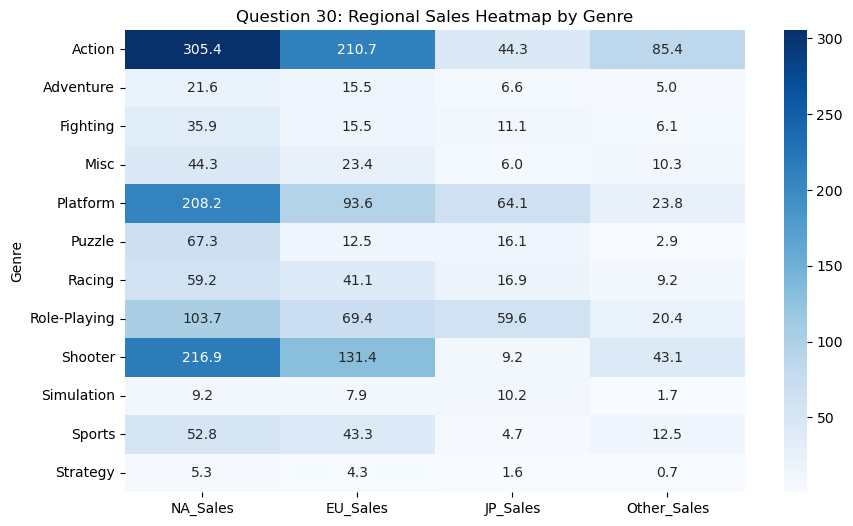

In [58]:
regional = merged.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()

plt.figure(figsize=(10,6))
sns.heatmap(regional, annot=True, fmt=".1f", cmap="Blues")
plt.title("Question 30: Regional Sales Heatmap by Genre")
plt.show()
